In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
MCACapacity = pd.read_csv("/Users/alexanderkell/Documents/SGI/Projects/11-starter-kits/data/processed/starter-kits/Kenya/Results/MCACapacity.csv")
MCACapacity

,technology,dst_region,region,agent,sector,type,year,capacity
0,gasboiler,Kenya,Kenya,A1,residential,retrofit,2020,10.0000
1,gasboiler,Kenya,Kenya,A2,residential,retrofit,2020,10.0000
2,Biomass Power Plant,Kenya,Kenya,A1,power,retrofit,2020,2.7864
3,Geothermal Power Plant,Kenya,Kenya,A1,power,retrofit,2020,12.9722
4,Large Hydropower Plant (Dam) (>100MW),Kenya,Kenya,A1,power,retrofit,2020,15.4490
...,...,...,...,...,...,...,...,...
200,Crude Oil Refinery Option 2,Kenya,Kenya,A1,oil,retrofit,2050,0.0681
201,Crude Oil Refinery Option 2,Kenya,Kenya,A1,oil,retrofit,2050,0.0257
202,Crude Oil Refinery Option 1,Kenya,Kenya,A2,oil,retrofit,2050,0.5673
203,Crude Oil Refinery Option 2,Kenya,Kenya,A2,oil,retrofit,2050,0.0681


In [66]:
MCACapacity_summed = MCACapacity.groupby(["technology", "sector", "year", "agent"]).sum().reset_index()
MCACapacity_summed

,technology,sector,year,agent,capacity
0,Biomass Power Plant,power,2020,A1,2.7864
1,Biomass Power Plant,power,2020,A2,2.7864
2,Biomass Power Plant,power,2025,A1,2.5078
3,Biomass Power Plant,power,2025,A2,2.5078
4,Biomass Power Plant,power,2030,A1,2.2570
...,...,...,...,...,...
190,gasboiler,residential,2040,A2,4.0920
191,gasboiler,residential,2045,A1,3.2700
192,gasboiler,residential,2045,A2,3.2700
193,gasboiler,residential,2050,A1,2.6200


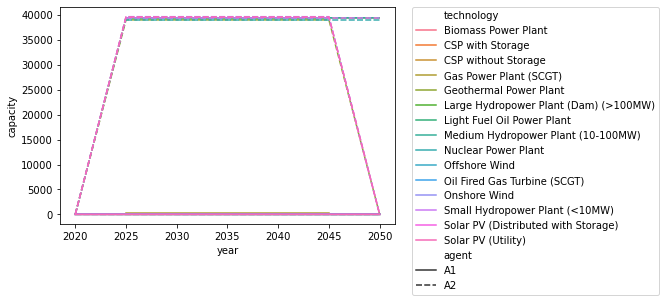

In [67]:
sns.lineplot(data=MCACapacity_summed[(MCACapacity_summed.sector=="power")], x="year", y="capacity", hue="technology", style="agent")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

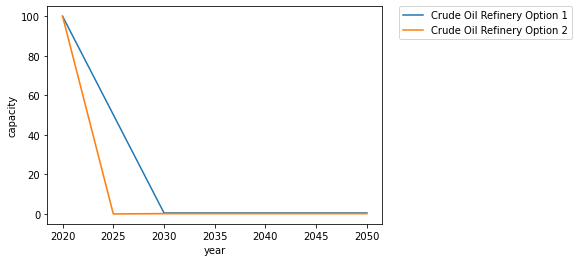

In [68]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="oil"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

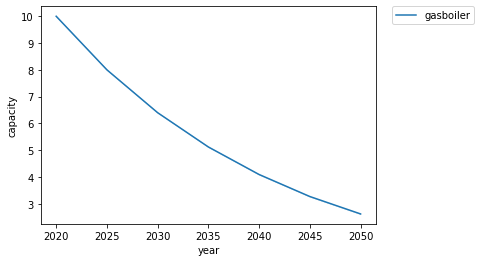

In [69]:
sns.lineplot(data=MCACapacity_summed[MCACapacity_summed.sector=="residential"], x="year", y="capacity", hue="technology")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)